In [2]:
!pip install cryptography

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
df = pd.read_csv(r"C:\Users\ADMIN\OneDrive\New folder (2)\Matplotlib\netflix_titles.csv", encoding='latin1')
df = df.dropna(subset = ["type",	'title'	,'director',	'cast',	'country',	'date_added',	'release_year',	'rating',	'duration'])
df = pd.read_csv(r"C:\Users\ADMIN\OneDrive\New folder (2)\Matplotlib\netflix_titles.csv", encoding="latin1")
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]  # remove all unnamed cols
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


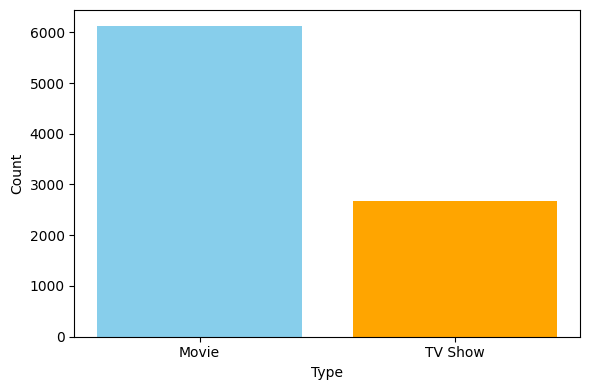

In [5]:
type_count=df["type"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index, type_count.values, color=['skyblue','orange'])
plt.xlabel('Type')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('movies vs Tvshows.png') #To save the chart as a png file of the given name

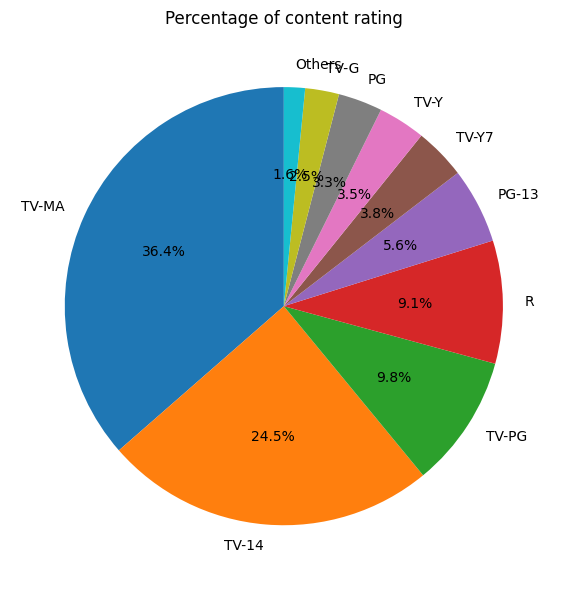

In [13]:
rating_counts = df['rating'].value_counts()
# Group rare ratings into "Others"
top_ratings = rating_counts[rating_counts > 100]   # threshold (adjust as needed)
others = rating_counts[rating_counts <= 100].sum()

rating_counts = pd.concat([top_ratings, pd.Series([others], index=['Others'])])

plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of content rating')
plt.tight_layout()
plt.savefig("Percentage of content rating.png")
plt.show()


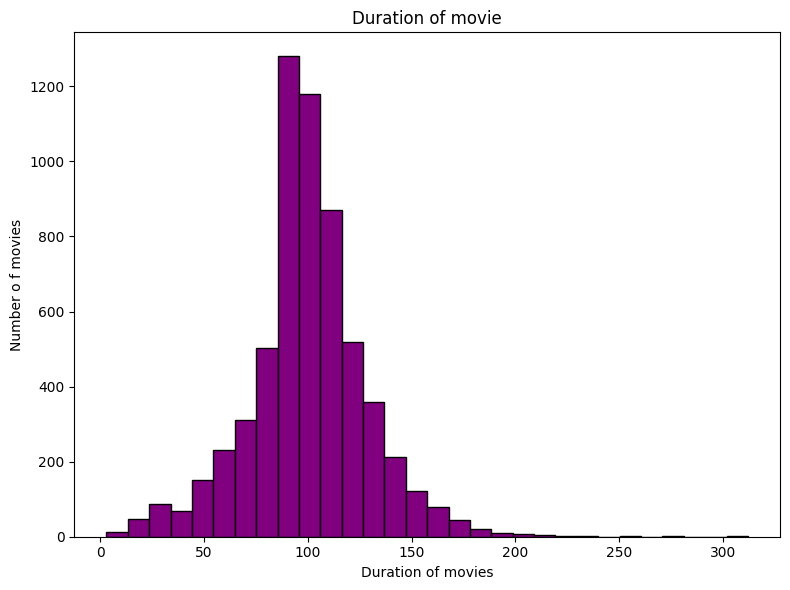

In [7]:
movie_df=df[df['type']=='Movie'].copy()
movie_df=movie_df[movie_df['duration'].str.contains('min', na = False)] #There were some NaN values written as strings
movie_df['duration_int']=(movie_df['duration'].str.replace('min', '', regex=False).str.strip().astype(int))
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30, color='purple', edgecolor='black')
plt.title('Duration of movie')
plt.xlabel('Duration of movies')
plt.ylabel('Number o f movies')
plt.tight_layout()
plt.savefig('Movie duration histogram')
plt.show()

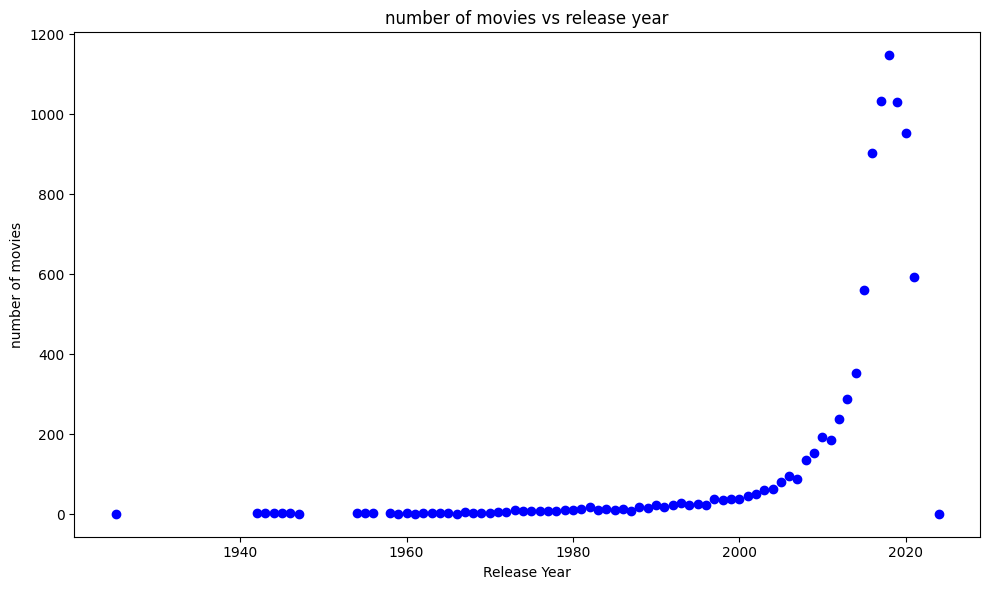

In [8]:
release_counts = df ['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='Blue' )
plt.title('number of movies vs release year')
plt.xlabel('Release Year')
plt.ylabel('number of movies')
plt.tight_layout()
plt.savefig("number of movies vs release year.png")
plt.show()

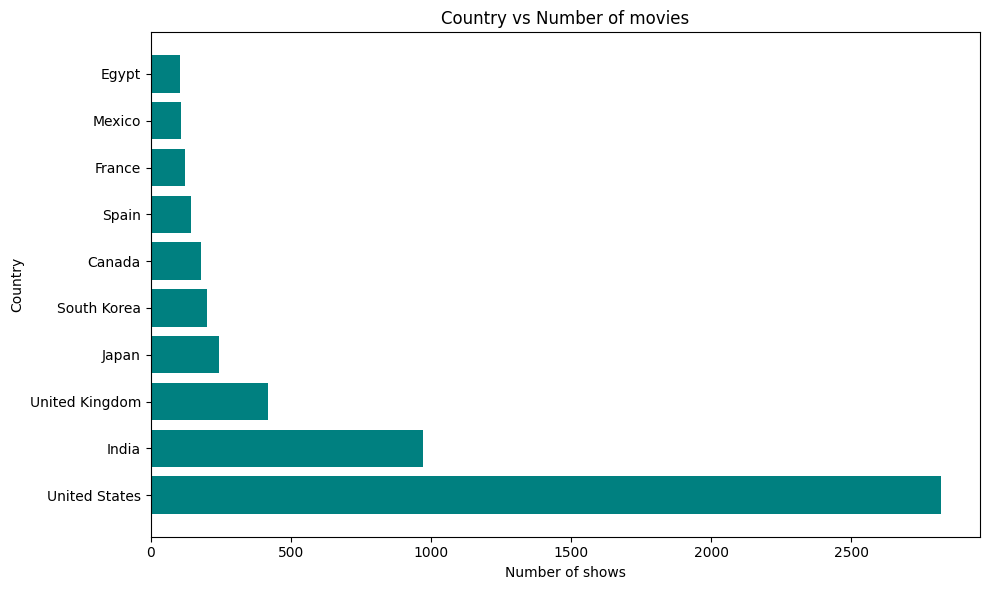

In [9]:
country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(country_counts.index, country_counts.values, color="teal")
plt.title('Country vs Number of movies')
plt.ylabel('Country')
plt.xlabel('Number of shows')
plt.tight_layout()
plt.savefig("top 10 Country vs Number of shows.png")
plt.show()

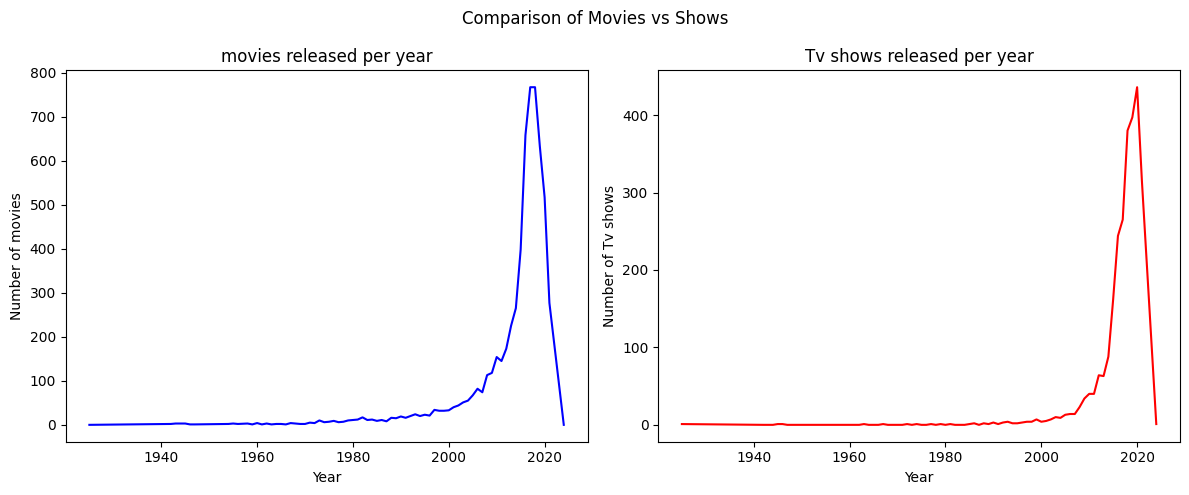

In [10]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(content_by_year.index,content_by_year['Movie'], color ='Blue')
ax[0].set_title('movies released per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of movies')

ax[1].plot(content_by_year.index,content_by_year['TV Show'], color ='Red')
ax[1].set_title('Tv shows released per year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Tv shows')

fig.suptitle('Comparison of Movies vs Shows')

plt.tight_layout()
plt.savefig('Tv shows vs movies')
plt.show()